# IMPORTING  MODULES

In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import RandomOverSampler
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import mean_absolute_error
from dtreeviz.trees import dtreeviz
from IPython.core.display import display, HTML
import matplotlib.pyplot as plt

# UPLOADING DATASET 

In [2]:
df = pd.read_excel(r'path\data_analysis.xlsx', names=['Power_output', 'Time', 'Respiratory_frequency', 'Respiratory_frequency_strain', 'Heart_rate', 'Heart_rate_arm','RPE'])

# TRAINING TEST SPLIT

In [3]:
X = df[['Power_output', 'Time', 'Respiratory_frequency',  'Heart_rate']].values
y = df['RPE'].values
y = y.astype(int)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=66)

# RANDOM OVERSAMPLING

In [4]:
dizionario = {12:100, 13:100, 14:100, 15:100, 16:100, 17:100, 18:100, 19:100}
oversample = RandomOverSampler(sampling_strategy=dizionario)
X_train_over, y_train_over = oversample.fit_resample(X_train, y_train)

D:\Anaconda\envs\Data_mining\lib\site-packages\imblearn\utils\_validation.py:300: UserWarning: After over-sampling, the number of samples (100) in class 12 will be larger than the number of samples in the majority class (class #15 -> 2)
  f"After over-sampling, the number of samples ({n_samples})"
D:\Anaconda\envs\Data_mining\lib\site-packages\imblearn\utils\_validation.py:300: UserWarning: After over-sampling, the number of samples (100) in class 13 will be larger than the number of samples in the majority class (class #15 -> 2)
  f"After over-sampling, the number of samples ({n_samples})"
D:\Anaconda\envs\Data_mining\lib\site-packages\imblearn\utils\_validation.py:300: UserWarning: After over-sampling, the number of samples (100) in class 14 will be larger than the number of samples in the majority class (class #15 -> 2)
  f"After over-sampling, the number of samples ({n_samples})"
D:\Anaconda\envs\Data_mining\lib\site-packages\imblearn\utils\_validation.py:300: UserWarning: After ov

# DECISION TREE REGRESSOR 

In [5]:
tree = DecisionTreeRegressor(max_depth=3, random_state=66)   
tree_1 = tree.fit(X_train, y_train)  
Y_pred = tree.predict(X_test)
Y_pred_train = tree.predict(X_train)

# EVALUATION OF PERFORMANCE

In [6]:
rms = mean_squared_error(y_test, Y_pred, squared=False)
mae = mean_absolute_error(y_test, Y_pred)
print(rms)
print(mae)


0.7071067811865476
0.5


# FEATURE IMPORTANCE ANALYSIS

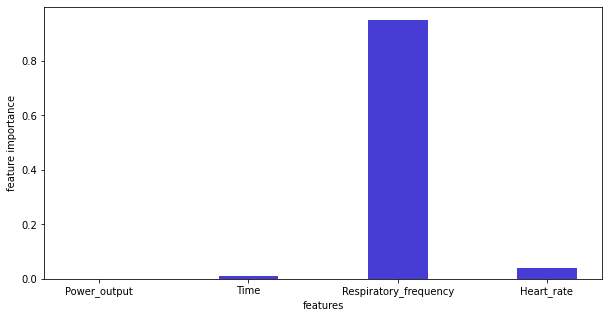

In [7]:
importance = tree_1.feature_importances_
importance = np.reshape(importance, (1,4))
importance = pd.DataFrame(importance, columns =['Power_output', 'Time', 'Respiratory_frequency',  'Heart_rate'])
valori = []
for x in importance.values:
    for n in x:
        valori.append(n)
fig = plt.figure(figsize = (10, 5))
plt.bar(importance.columns, valori, color ='#473DD4', width = 0.4)
plt.xlabel('features')
plt.ylabel('feature importance')
plt.savefig('plot_1.jpg')


In [8]:
import os
os.environ["PATH"] += os.pathsep + 'path/graphviz/'

# DECISION TREE PLOT

In [9]:
from dtreeviz.trees import dtreeviz

viz = dtreeviz(tree_1, X, y,           
                feature_names=importance.columns, target_name = 'RPE', colors={'scatter_marker': '#ff0004'}, ticks_fontsize=9, scale=1.5, precision= 1, max_X_features_LR=12,label_fontsize=12,
              )


display(HTML(viz.svg()))
